# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [20]:
#  1. Get the total rides for each city type
rides = pyber_data_df.groupby('type').count()['ride_id']
rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [21]:
# 2. Get the total drivers for each city type
drivers = city_data_df.groupby('type').sum()['driver_count']
drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [22]:
#  3. Get the total amount of fares for each city type
fares = pyber_data_df.groupby('type').sum()['fare']
fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [23]:
#  4. Get the average fare per ride for each city type. 
fare_per_ride = fares / rides
fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [24]:
# 5. Get the average fare per driver for each city type. 
fare_per_driver = fares/drivers
fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [25]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides': rides, 'Total Drivers': drivers, 
                                 'Total Fares': fares, 'Average Fare per Ride': fare_per_ride, 
                                 'Average Fare per Driver': fare_per_driver})

In [26]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [27]:
#  8. Format the columns.
for colnam in pyber_summary_df.columns:
    if colnam == 'Total Rides' or colnam == 'Total Drivers':
        pyber_summary_df[colnam] = pyber_summary_df[colnam].map("{:,.0f}".format)
    else:
        pyber_summary_df[colnam] = pyber_summary_df[colnam].map("${:,.2f}".format)

In [28]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [29]:
# 1. Read the merged DataFrame      reset, just incase
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban


In [32]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
daf1 = pyber_data_df.groupby(['date', 'type']).sum()
daf1

# same number of rows as original: that groupby did nothing! can skip this step.

,,fare,ride_id,driver_count
date,type,,,
2019-01-01 00:08:16,Urban,37.91,5673666505216,69
2019-01-01 00:46:46,Suburban,47.74,2215912677020,23
2019-01-01 02:07:24,Suburban,24.07,7827431948090,10
2019-01-01 03:46:50,Urban,7.57,5815378003370,64
2019-01-01 05:23:21,Urban,10.75,6571513080673,28
...,...,...,...,...
2019-05-08 04:20:00,Urban,21.99,117997692054,52
2019-05-08 04:39:49,Urban,18.45,1811574736337,11
2019-05-08 07:29:01,Urban,18.55,5682021476085,33


In [33]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
daf1.reset_index(inplace = True)
daf1.head(2)

,date,type,fare,ride_id,driver_count
0,2019-01-01 00:08:16,Urban,37.91,5673666505216,69
1,2019-01-01 00:46:46,Suburban,47.74,2215912677020,23


In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
daf2 = daf1.pivot(index='date', columns='type', values='fare')
daf2

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [37]:
# 5. Create a new DataFrame from the pivot table DataFrame
# using loc on the given dates, '2019-01-01':'2019-04-29'.
daf3 = daf2.loc['2019-01-01':'2019-04-29']
daf3

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [39]:
# 6. Set the "date" index to datetime datatype. 
# This is necessary to use the resample() method in Step 8.
daf3.index = pd.to_datetime(daf3.index)

In [42]:
# 7. Check that the datatype for the index is datetime using df.info()
daf3.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2196 non-null   datetime64[ns]
 1   Rural     114 non-null    float64       
 2   Suburban  573 non-null    float64       
 3   Urban     1509 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 68.8 KB


In [43]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' 
# and get the sum of the fares for each week.
daf4 = daf3.resample('W').sum()
daf4

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [65]:
# 8. Using the object-oriented interface method, plot the resample DataFrame
# using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


In [58]:
month_starts = [pd.to_datetime('2019-01-01'), pd.to_datetime('2019-02-01'), 
               pd.to_datetime('2019-03-01'), pd.to_datetime('2019-04-01')]

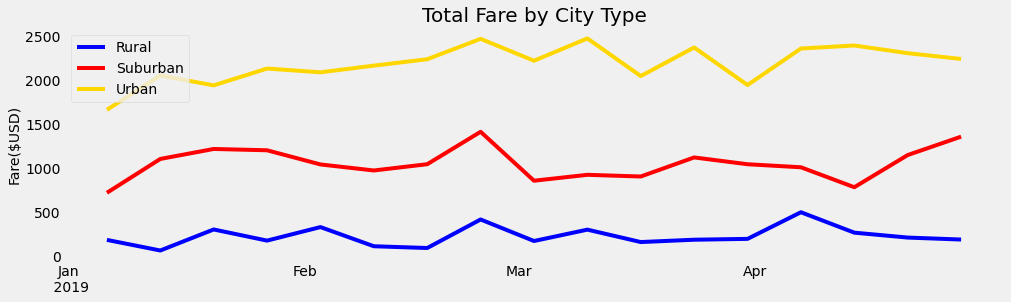

In [67]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_title('Total Fare by City Type',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
# ax.set_xlabel("2019",fontsize=14)

ax.plot(daf4['Rural'], color='blue', label ='Rural')
ax.plot(daf4['Suburban'], color='red', label ='Suburban')
ax.plot(daf4['Urban'], color='gold', label = 'Urban')

ax.set_xticks(month_starts)
ax.set_xticklabels(['Jan\n 2019', 'Feb', 'Mar', 'Apr'])

ax.grid()
ax.legend()

# Save the figure.
plt.savefig("analysis/Fig8.png")

plt.show()